# Lima, Perú: What places are more exposed to crime?

## IBM Applied Data Science Capstone, Final Project

### Data Cleaning

In [74]:
import pandas as pd
import numpy as np
from bs4 import BeautifulSoup
import requests
import re

url = 'https://raw.githubusercontent.com/DRodrigo96/Coursera_Capstone/master/DataBase/Lima_LocationDistritosCrime.csv'
df_lima = pd.read_csv(url, index_col=0, sep=';')
df_lima.reset_index(inplace = True)
df_lima["Tasa D"] = df_lima["Tasa D"]*100

df_lima = df_lima.astype({"Ubigeo": "str"})

for x in range(df_lima["Ubigeo"].count()):
    if len(df_lima["Ubigeo"][x]) < 6:
           df_lima["Ubigeo"][x] = "0" + df_lima["Ubigeo"][x]
    else:
        pass

/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [75]:
df_lima.head(5)

,Ubigeo,Distrito,Y,X,Delito,Tasa D,Poblacion
0,150102,Ancon,-11.7764,-77.1703,530,0.296477,42124
1,150103,Ate,-12.0256,-76.9242,6630,3.708759,672160
2,150104,Barranco,-12.1494,-77.0247,2021,1.130528,29424
3,070102,Bellavista,-12.0625,-77.1317,1396,0.780909,72625
4,150105,Brenna,-12.0567,-77.0536,2493,1.394560,75882


### Maps

In [76]:
#!conda install -c conda-forge folium
import json
from geopy.geocoders import Nominatim 
from pandas.io.json import json_normalize
import matplotlib.cm as cm
import matplotlib.colors as colors
from sklearn.cluster import KMeans
import folium

In [77]:
# Lima Metropolitana's coordinates

address = 'Lima, PE'
geolocator = Nominatim(user_agent="on_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude

In [78]:
# Geojson file for maps in Perú

import urllib.request, json 
url = "https://raw.githubusercontent.com/juaneladio/peru-geojson/master/peru_distrital_simple.geojson"
response = urllib.request.urlopen(url)
peru_distrital_simple = json.loads(response.read())

In [79]:
# Lima's crime rates maps

df_temp = df_lima[["Ubigeo", "Tasa D"]]

crime_map = folium.Map(
    location=[latitude, longitude], 
    zoom_start=10, tiles = "OpenStreetMap")

threshold_scale = np.linspace(
    df_lima['Tasa D'].min(),
    df_lima['Tasa D'].max(),
    6, dtype=int)

threshold_scale = threshold_scale.tolist() 
threshold_scale[-1] = threshold_scale[-1] + 1

crime_map.choropleth(
    geo_data = peru_distrital_simple,
    data= df_temp,
    columns=['Ubigeo', 'Tasa D'],
    key_on='feature.properties.IDDIST',
    threshold_scale= threshold_scale,
    fill_color='YlOrRd', 
    fill_opacity=0.6,
    line_opacity=0.2,
    nan_fill_opacity = 0.1,
    legend_name='Crime rates (%), Lima',
    reset = True)

In [80]:
# The code was removed by Watson Studio for sharing.

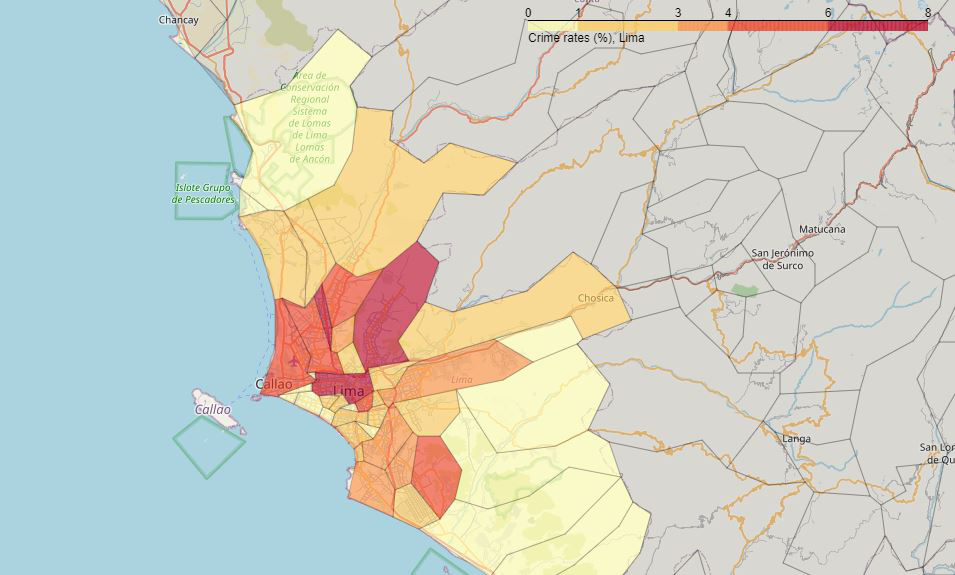

In [81]:
from PIL import Image
img = Image.open(streaming_body_4)
img

In [82]:
# Population map

df_temp2 = df_lima[["Ubigeo", "Poblacion"]]

pob_map = folium.Map(
    location=[latitude, longitude], 
    zoom_start=10, tiles = "OpenStreetMap")

threshold_scale2 = np.linspace(
    df_lima['Poblacion'].min(),
    df_lima['Poblacion'].max(),
    6, dtype=int)

threshold_scale2 = threshold_scale2.tolist()
threshold_scale2[-1] = threshold_scale2[-1] + 1 

pob_map.choropleth(
    geo_data = peru_distrital_simple,
    data= df_temp2,
    columns=['Ubigeo', 'Poblacion'],
    key_on='feature.properties.IDDIST',
    threshold_scale= threshold_scale2,
    fill_color='YlGnBu', 
    fill_opacity=0.6,
    line_opacity=0.2,
    nan_fill_opacity = 0.1,
    legend_name='Population, Lima',
    reset = True)

In [83]:
# The code was removed by Watson Studio for sharing.

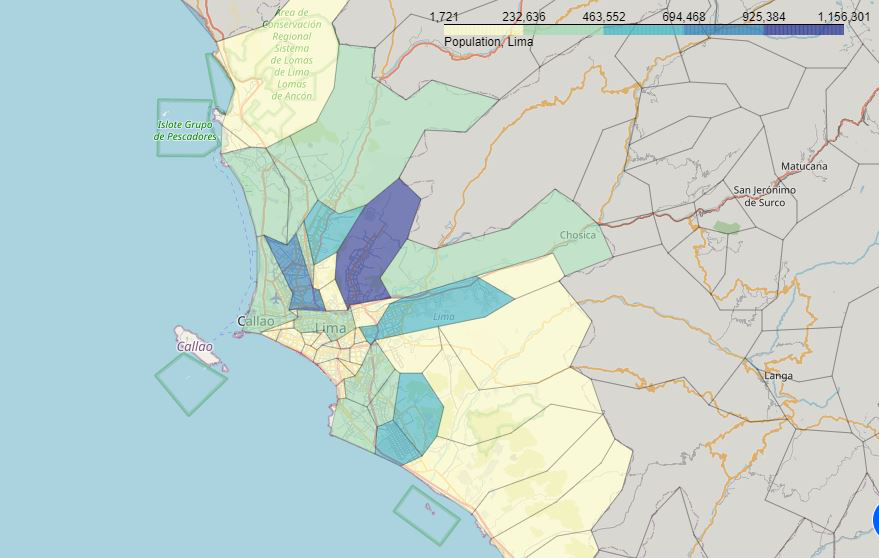

In [84]:
from PIL import Image
img = Image.open(streaming_body_5)
img

### Foursquare API information

In [85]:
# The code was removed by Watson Studio for sharing.

In [86]:
# Function for retrieving venues

def getNearbyVenues(names, latitudes, longitudes, radius=500):
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighbourhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [87]:
# Retrieving venues from Lima

lima_venues = getNearbyVenues(
    names=df_lima['Distrito'],
    latitudes=df_lima['Y'],
    longitudes=df_lima['X']
    )

lima_venues.head()

,Neighbourhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Ancon,-11.7764,-77.1703,Restaurant Renzo's,-11.774114,-77.168802,Seafood Restaurant
1,Ancon,-11.7764,-77.1703,Licorerias De Ancon,-11.776381,-77.167252,Liquor Store
2,Ancon,-11.7764,-77.1703,Restaurant Cevichería Karlita,-11.773944,-77.173813,Fish & Chips Shop
3,Ancon,-11.7764,-77.1703,Panaderia De Ancón,-11.773204,-77.173143,Bakery
4,Ate,-12.0256,-76.9242,Plaza Vitarte,-12.026369,-76.921561,Plaza


### One-Hot enconding

In [88]:
lima_onehot = pd.get_dummies(lima_venues[['Venue Category']], prefix="", prefix_sep="")
lima_onehot['Neighbourhood'] = lima_venues['Neighbourhood'] 
fixed_columns = [lima_onehot.columns[-1]] + list(lima_onehot.columns[:-1])
lima_onehot = lima_onehot[fixed_columns]

lima_grouped = lima_onehot.groupby('Neighbourhood').mean().reset_index()

In [89]:
# Sort the venues in descending order.

def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

# Dataframe and display the top 10 venues for each district.
num_top_venues = 10
indicators = ['st', 'nd', 'rd']

columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Venue'.format(ind+1))

# creating a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = lima_grouped['Neighbourhood']

for ind in np.arange(lima_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(lima_grouped.iloc[ind, :], num_top_venues)

### Clustering

In [90]:
kclusters = 5
lima_grouped_clustering = lima_grouped.drop('Neighbourhood', 1)

kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(lima_grouped_clustering)
kmeans.labels_[0:10] 

# Clusters and top 10 venues for each district.
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)
lima_merged = df_lima

# merge original dataset to get information on crimes
lima_merged = lima_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Distrito')

lima_merged["Cluster Labels"].value_counts()
lima_merged.dropna(subset=['Cluster Labels'], inplace = True)
lima_merged = lima_merged.astype({"Cluster Labels": "int32"})

### Results by cluster

In [91]:
# Table 1
table_1 = lima_merged.loc[lima_merged['Cluster Labels'] == 0, lima_merged.columns[[1] + list(range(5, lima_merged.shape[1]))]]
table_1.sort_values(by = "Tasa D", axis=0, ascending=False).head()


,Distrito,Tasa D,Poblacion,Cluster Labels,1st Venue,2nd Venue,3rd Venue,4th Venue,5th Venue,6th Venue,7th Venue,8th Venue,9th Venue,10th Venue
30,Puente Piedra,2.399785,378910,0,Construction & Landscaping,Yoga Studio,Dog Run,Food,Fish & Chips Shop,Fast Food Restaurant,Farmers Market,Falafel Restaurant,Electronics Store,Donut Shop


In [92]:
# Table 2
table_2 = lima_merged.loc[lima_merged['Cluster Labels'] == 1, lima_merged.columns[[1] + list(range(5, lima_merged.shape[1]))]]
table_2.sort_values(by = "Tasa D", axis=0, ascending=False).head()


,Distrito,Tasa D,Poblacion,Cluster Labels,1st Venue,2nd Venue,3rd Venue,4th Venue,5th Venue,6th Venue,7th Venue,8th Venue,9th Venue,10th Venue
19,Lima,7.802378,269858,1,Restaurant,Art Gallery,Peruvian Restaurant,Sandwich Place,Museum,Seafood Restaurant,Bakery,Plaza,Indie Theater,Café
21,Los Olivos,7.322421,390742,1,Park,Soccer Field,Restaurant,Seafood Restaurant,Burger Joint,Market,Bus Stop,Cafeteria,Department Store,Dessert Shop
37,San Juan de Lurigancho,6.801629,1156300,1,Restaurant,Dessert Shop,BBQ Joint,Farmers Market,Seafood Restaurant,Scenic Lookout,Snack Place,Fast Food Restaurant,Asian Restaurant,Park
40,San Martin de Porres,5.086538,741417,1,Dog Run,Shopping Mall,Peruvian Restaurant,Market,Food,Yoga Studio,Fast Food Restaurant,Farmers Market,Falafel Restaurant,Electronics Store
11,Comas,5.063043,545685,1,BBQ Joint,Bar,Clothing Store,Pet Store,Fish & Chips Shop,Fast Food Restaurant,Farmers Market,Falafel Restaurant,Electronics Store,Donut Shop


In [93]:
# Table 3
table_3 = lima_merged.loc[lima_merged['Cluster Labels'] == 2, lima_merged.columns[[1] + list(range(5, lima_merged.shape[1]))]]
table_3.sort_values(by = "Tasa D", axis=0, ascending=False).head()


,Distrito,Tasa D,Poblacion,Cluster Labels,1st Venue,2nd Venue,3rd Venue,4th Venue,5th Venue,6th Venue,7th Venue,8th Venue,9th Venue,10th Venue
6,Carabayllo,2.573756,322936,2,Supermarket,Athletics & Sports,Yoga Studio,Diner,Fish & Chips Shop,Fast Food Restaurant,Farmers Market,Falafel Restaurant,Electronics Store,Donut Shop
48,Villa El Salvador,2.317555,489583,2,Peruvian Restaurant,Fast Food Restaurant,Bar,Yoga Studio,Dog Run,Fish & Chips Shop,Farmers Market,Falafel Restaurant,Electronics Store,Donut Shop
33,Rimac,2.254903,165451,2,Shopping Mall,Peruvian Restaurant,Athletics & Sports,Park,Dog Run,Yoga Studio,Diner,Fast Food Restaurant,Farmers Market,Falafel Restaurant
25,Mi Peru,0.276339,63542,2,Shopping Mall,Peruvian Restaurant,Athletics & Sports,Yoga Studio,Dog Run,Fish & Chips Shop,Fast Food Restaurant,Farmers Market,Falafel Restaurant,Electronics Store


In [94]:
# Table 4
table_4 = lima_merged.loc[lima_merged['Cluster Labels'] == 3, lima_merged.columns[[1] + list(range(5, lima_merged.shape[1]))]]
table_4.sort_values(by = "Tasa D", axis=0, ascending=False).head()


,Distrito,Tasa D,Poblacion,Cluster Labels,1st Venue,2nd Venue,3rd Venue,4th Venue,5th Venue,6th Venue,7th Venue,8th Venue,9th Venue,10th Venue
22,Lurigancho,1.305617,232902,3,Playground,Yoga Studio,Diner,Fish & Chips Shop,Fast Food Restaurant,Farmers Market,Falafel Restaurant,Electronics Store,Donut Shop,Dog Run


In [95]:
# Table 5
table_5 = lima_merged.loc[lima_merged['Cluster Labels'] == 4, lima_merged.columns[[1] + list(range(5, lima_merged.shape[1]))]]
table_5.sort_values(by = "Tasa D", axis=0, ascending=False).head()


,Distrito,Tasa D,Poblacion,Cluster Labels,1st Venue,2nd Venue,3rd Venue,4th Venue,5th Venue,6th Venue,7th Venue,8th Venue,9th Venue,10th Venue
28,Pucusana,0.109081,18284,4,Beach,Park,Harbor / Marina,Italian Restaurant,Cajun / Creole Restaurant,Dog Run,Fish & Chips Shop,Fast Food Restaurant,Farmers Market,Falafel Restaurant
43,Santa Maria del Mar,0.001120,1721,4,Harbor / Marina,Beach,Seafood Restaurant,Yoga Studio,Diner,Fast Food Restaurant,Farmers Market,Falafel Restaurant,Electronics Store,Donut Shop
